In [1]:
data_path = "/home/hoangbaoan1901/Documents/information-system_UET/sem5/cshttt/explainable_active_learning_randomforest/xal4food/backup_log"

In [2]:
import os

# List all files in the data_path directory
files = os.listdir(data_path)

# Filter out the .pkl files
pkl_files = [file for file in files if file.endswith('.pkl')]

print(pkl_files)

['1_0_30_cluster_based_user2_Uncertainty_False.pkl', '1_0_30_cluster_based_sportive_user1_UncertaintyClustered_False.pkl', '1_0_30_cluster_based_unhealthy_user3_Uncertainty_False.pkl', '1_0_30_random_sportive_user1_Random_False.pkl', '1_0_30_cluster_based_elder_user2_MostUncertainCluster_False.pkl', '1_0_30_cluster_based_user1_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_random_UncertaintyClustered_False.pkl', '1_0_30_cluster_based_random_Uncertainty_False.pkl', '1_0_30_cluster_based_sportive_user1_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_user2_UncertaintyClustered_False.pkl', '1_0_30_cluster_based_unhealthy_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_elder_user2_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_unhealthy_user3_UncertaintyClustered_False.pkl', '1_0_30_random_unhealthy_user3_Random_True.pkl', '1_0_30_cluster_based_vegan_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user3_MostUncertainCluster_True.pkl', '1_0_30_cluster_based

In [3]:
true_files = [file for file in pkl_files if 'True' in file]
print(true_files)
print(len(true_files))

false_files = [file for file in pkl_files if 'False' in file]
print(false_files)
print(len(false_files))

['1_0_30_cluster_based_user1_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_sportive_user1_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_unhealthy_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_elder_user2_MostUncertainCluster_True.pkl', '1_0_30_random_unhealthy_user3_Random_True.pkl', '1_0_30_cluster_based_vegan_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user3_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_sportive_user3_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_random_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user1_ClusteredUncertainty_True.pkl', '1_0_30_cluster_based_random_ClusteredUncertainty_True.pkl', '1_0_30_random_user2_Random_True.pkl', '1_0_30_cluster_based_unhealthy_user3_ClusteredUncertainty_True.pkl', '1_0_30_cluster_based_random_MostUncertainCluster_True.pkl', '1_0_30_random_vegan_user2_Random_True.pkl', '1_0_30_cluster_based_user2_UncertaintyClu

In [4]:
strategy_names = ['Uncertainty', 'MostUncertainCluster', 'ClusteredUncertainty', 'UncertaintyClustered']
true_strategy_files = []

for strategy_name in strategy_names:
	files_list = []
	for file in true_files:
		if file.split('.')[0].split('_')[-2] == strategy_name:
			files_list.append(file)
	true_strategy_files.append(files_list)

for files_list in true_strategy_files:
	print(files_list)
	print(len(files_list))

false_strategy_files = []
for strategy_name in strategy_names:
	files_list = []
	for file in false_files:
		if file.split('.')[0].split('_')[-2] == strategy_name:
			files_list.append(file)
	false_strategy_files.append(files_list)


['1_0_30_cluster_based_unhealthy_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_vegan_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_random_Uncertainty_True.pkl', '1_0_30_cluster_based_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_elder_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user3_Uncertainty_True.pkl', '1_0_30_cluster_based_unhealthy_user3_Uncertainty_True.pkl', '1_0_30_cluster_based_user3_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user1_Uncertainty_True.pkl']
10
['1_0_30_cluster_based_elder_user2_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_sportive_user3_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_random_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_vegan_user2_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_user1_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_unhealthy_user3_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_unhealthy_user1_Most

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# format: f1, mcc
true_f1_strategy = []
true_mcc_strategy = []
for files_list in true_strategy_files:
	f1_list = []
	mcc_list = []
	for file in files_list:
		with open(os.path.join(data_path, file), 'rb') as f:
			data = pickle.load(f)
			f1_list.append([data.scores[i][0] for i in range(len(data.scores))])
			print(f1_list)
			mcc_list.append([data.scores[i][1] for i in range(len(data.scores))])
			print(mcc_list)
	true_f1_strategy.append(f1_list)
	true_mcc_strategy.append(mcc_list)

false_f1_strategy = []
false_mcc_strategy = []

for files_list in false_strategy_files:
	f1_list = []
	mcc_list = []
	for file in files_list:
		with open(os.path.join(data_path, file), 'rb') as f:
			data = pickle.load(f)
			f1_list.append([data.scores[i][0] for i in range(len(data.scores))])
			mcc_list.append([data.scores[i][1] for i in range(len(data.scores))])
	false_f1_strategy.append(f1_list)
	false_mcc_strategy.append(mcc_list)


[[0.769204558361413, 0.7695207727656382, 0.7805364175586198, 0.7930460953587835, 0.787039293477731, 0.7961773898802689, 0.8034264735875994, 0.8121939217845678, 0.8214869142979462, 0.8025140832943839, 0.7935057064942935, 0.8146820336373042, 0.8070737568550126, 0.8109948858157673, 0.8301675722569746, 0.8318049628399835, 0.8284910752761334, 0.8305373540544558, 0.8256417617646356, 0.8229248155592196, 0.822208554924448, 0.8181606690257252, 0.8286422564613505, 0.8344748084356141, 0.8378112413035518, 0.8274317304484583, 0.8258092145176832, 0.8336525370930152, 0.8397746321475135, 0.8320599618546237, 0.8346216482785512, 0.8347186449065899, 0.8303018364086064, 0.8322462291072157, 0.8341464516420473, 0.8312068652379223, 0.8360006923210062, 0.8359580800766327, 0.8332309119369239, 0.8376395681461659, 0.8388490574996439, 0.8316716818330131, 0.8391024110766293, 0.840432102362113, 0.8425992694430982, 0.8391218239783595, 0.8371514915188146, 0.8384618137997686, 0.8405407674867748, 0.8436682676304151, 0.

In [6]:
true_f1_average = []

for i in range(4):
	f1_strat_avg = []
	for j in range (52):
		s = 0
		for k in range(10):
			try:
				s += true_f1_strategy[i][k][j]
			except IndexError:
				print(i, j, k)
				raise IndexError
		s /= 10
		f1_strat_avg.append(s)
	true_f1_average.append(f1_strat_avg)

true_mcc_average = []

for i in range(4):
	mcc_strat_avg = []
	for j in range (52):
		s = 0
		for k in range(10):
			s += true_mcc_strategy[i][k][j]
		s /= 10
		mcc_strat_avg.append(s)
	true_mcc_average.append(mcc_strat_avg)


false_f1_average = []

for i in range(4):
	f1_strat_avg = []
	for j in range (52):
		s = 0
		for k in range(10):
			try:
				s += false_f1_strategy[i][k][j]
			except IndexError:
				print(i, j, k)
				raise IndexError
		s /= 10
		f1_strat_avg.append(s)
	false_f1_average.append(f1_strat_avg)

false_mcc_average = []

for i in range(4):
	mcc_strat_avg = []
	for j in range (52):
		s = 0
		for k in range(10):
			s += false_mcc_strategy[i][k][j]
		s /= 10
		mcc_strat_avg.append(s)
	false_mcc_average.append(mcc_strat_avg)

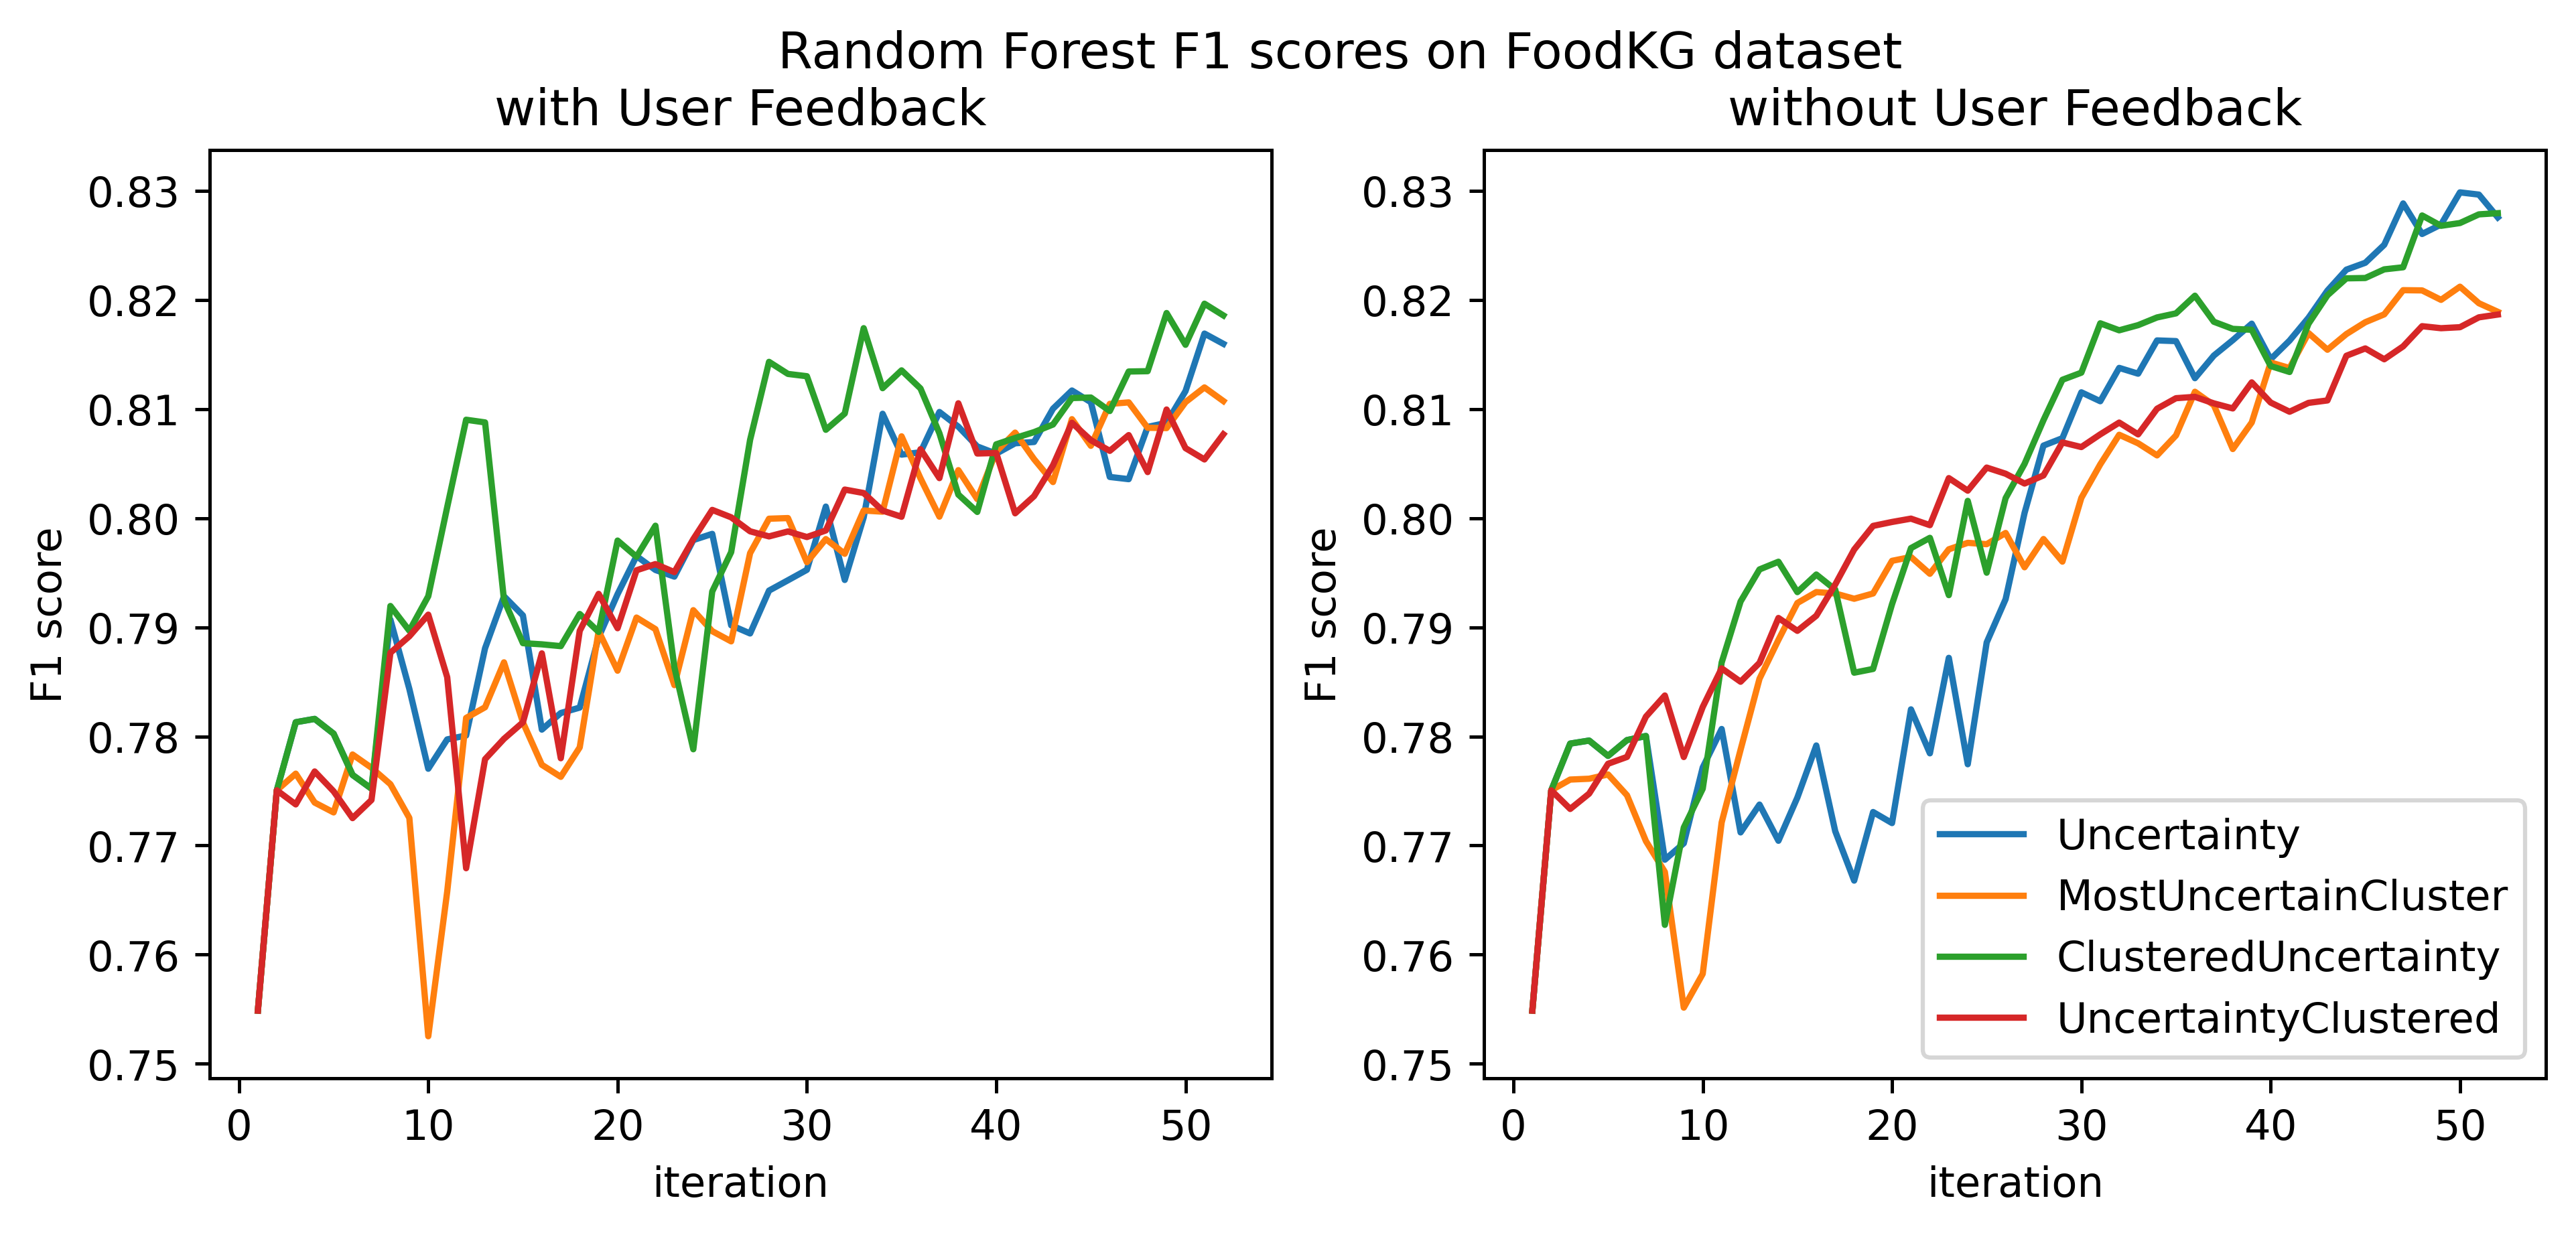

In [ ]:
# Plot the average F1 score of the true and false labels
# Create sublot for 2 plots
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=450)
fig.suptitle('Random Forest F1 scores on FoodKG dataset')
x = np.arange(1, 53)
for i in range(4):
	axs[0].plot(x, true_f1_average[i], label=strategy_names[i])
	axs[1].plot(x, false_f1_average[i], label=strategy_names[i])
axs[0].set_title('with User Feedback')
axs[1].set_title('without User Feedback')
axs[0].set_xlabel('iteration')
axs[1].set_xlabel('iteration')
axs[0].set_ylabel('F1 score')
axs[1].set_ylabel('F1 score')

axs[1].tick_params(axis='y', labelleft=True)
plt.legend()

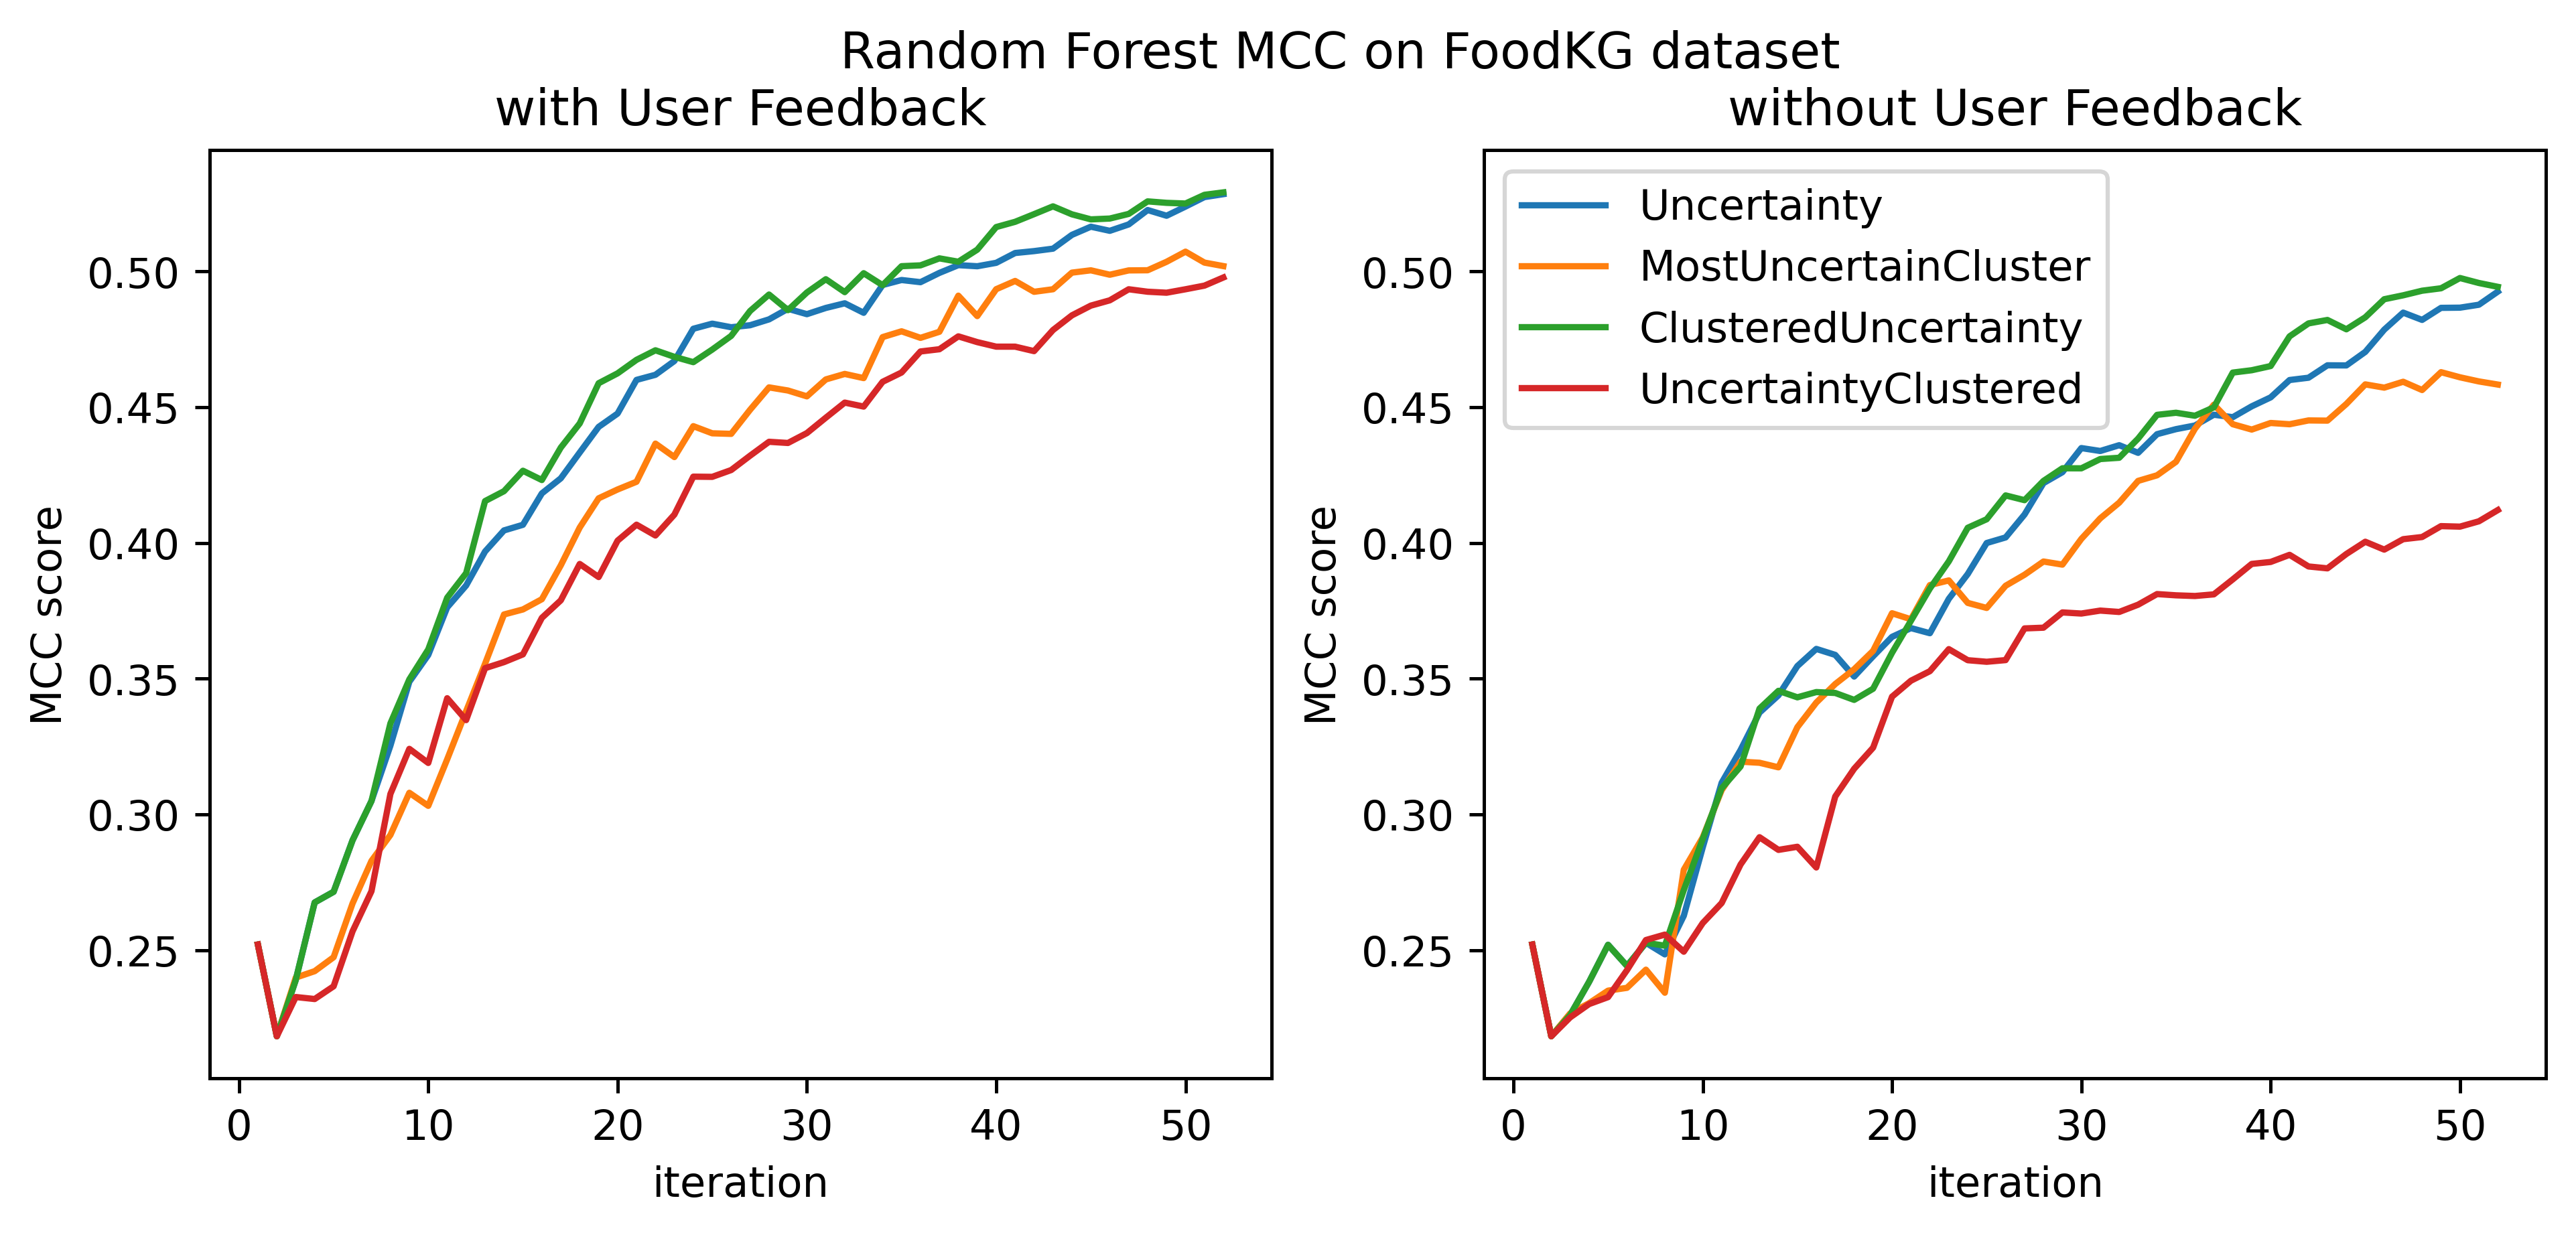

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=450)
fig.suptitle('Random Forest MCC on FoodKG dataset')
x = np.arange(1, 53)
for i in range(4):
	axs[0].plot(x, true_mcc_average[i], label=strategy_names[i])
	axs[1].plot(x, false_mcc_average[i], label=strategy_names[i])
axs[0].set_title('with User Feedback')
axs[1].set_title('without User Feedback')
axs[0].set_xlabel('iteration')
axs[1].set_xlabel('iteration')
axs[0].set_ylabel('MCC score')
axs[1].set_ylabel('MCC score')
# Show second y-axis
axs[1].tick_params(axis='y', labelleft=True)
plt.legend()